In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

In [2]:
datapath="/silor/boergel/paper/runoff_prediction/data"
datapathPP="/silod9/boergel/runoff_prediction_ERA5_downscaled_coupled_model/resampled"

runoff = xr.open_dataset(f"{datapath}/runoff.nc").load()
runoff = runoff.sel(time=slice("1979", "2005"))
runoff = runoff.roflux

DataRain = xr.open_dataset(f"{datapathPP}/rain.nc")
DataRain = DataRain.sel(time=slice("1979", "2005"))
DataRain = DataRain.rain.squeeze()
DataRain = DataRain.drop(["lon","lat"])
DataRain = DataRain.rename({"rlon":"x","rlat":"y"})

DataShumi = xr.open_dataset(f"{datapathPP}/QV.nc")
DataShumi = DataShumi.sel(time=slice("1979", "2005"))
DataShumi = DataShumi.QV.squeeze()
DataShumi = DataShumi.drop(["lon","lat"])
DataShumi = DataShumi.rename({"rlon":"x","rlat":"y"})

DataWindSpeed = xr.open_dataset(f"{datapathPP}/speed.nc")
DataWindSpeed = DataWindSpeed.sel(time=slice("1979", "2005"))
DataWindSpeed = DataWindSpeed.speed.squeeze()
DataWindSpeed = DataWindSpeed.drop(["lon","lat"])
DataWindSpeed = DataWindSpeed.rename({"rlon":"x","rlat":"y"})

DataTemp = xr.open_dataset(f"{datapathPP}/T.nc")
DataTemp = DataTemp.sel(time=slice("1979", "2005"))
DataTemp = DataTemp.T.squeeze()
DataTemp = DataTemp.drop(["lon","lat"])
DataTemp = DataTemp.rename({"rlon":"x","rlat":"y"})

assert DataShumi.time[0] == DataRain.time[0] == DataWindSpeed.time[0]
assert len(DataShumi.time) == len(DataRain.time) == len(DataWindSpeed.time)

data = xr.merge([DataRain, DataShumi, DataWindSpeed, DataTemp])
assert len(runoff.time) == len(data.time)

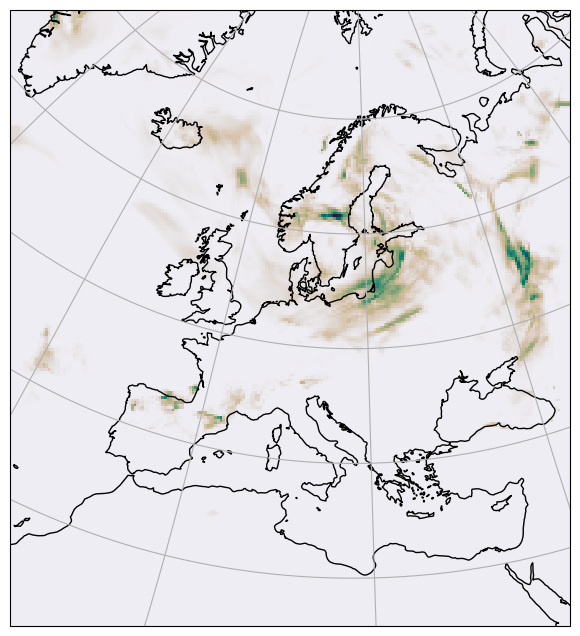

In [32]:
projection = ccrs.RotatedPole(pole_longitude=-162,
                              pole_latitude=39.25)
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
ax.coastlines(resolution="50m")
ax.gridlines(draw_labels=False)

plt.pcolormesh(data['x'], data['y'], data.isel(time=200).rain.data, transform=projection, cmap=cmocean.cm.rain)
#plt.colorbar(label='Total Precipitation (kg m-2)')
#plt.title('Total Precipitation Amount on 1979-01-01')
plt.savefig("figures/precip.png",dpi=300)

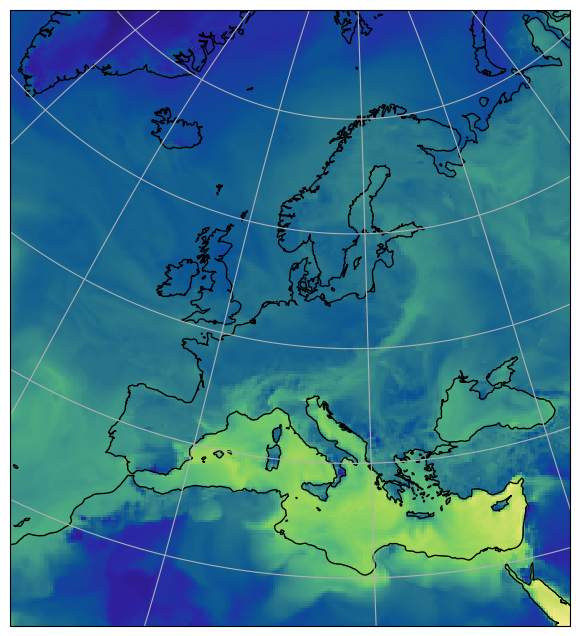

In [30]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
ax.coastlines(resolution="50m")
ax.gridlines(draw_labels=False)

plt.pcolormesh(data['x'], data['y'], data.isel(time=200).QV.data, transform=projection, cmap=cmocean.cm.haline)
#plt.colorbar(label='Total Precipitation (kg m-2)')
#plt.title('Total Precipitation Amount on 1979-01-01')
plt.savefig("figures/QV.png",dpi=300)

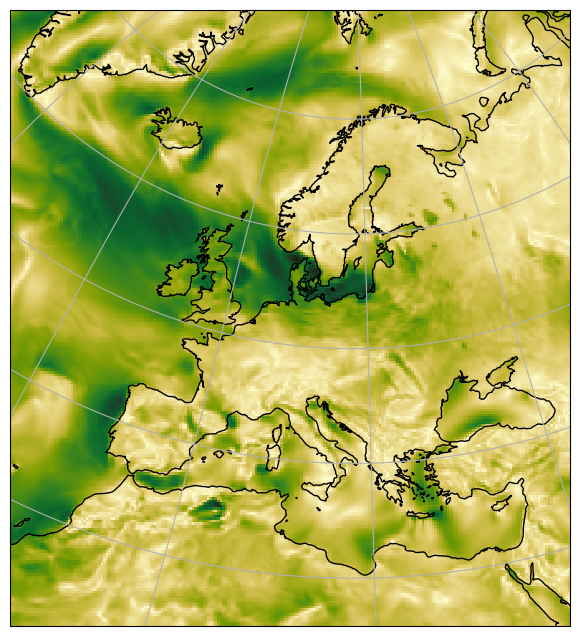

In [33]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
ax.coastlines(resolution="50m")
ax.gridlines(draw_labels=False)

plt.pcolormesh(data['x'], data['y'], data.isel(time=200).speed.data, transform=projection, cmap=cmocean.cm.speed)
#plt.colorbar(label='Total Precipitation (kg m-2)')
#plt.title('Total Precipitation Amount on 1979-01-01')
plt.savefig("figures/speed.png",dpi=300)

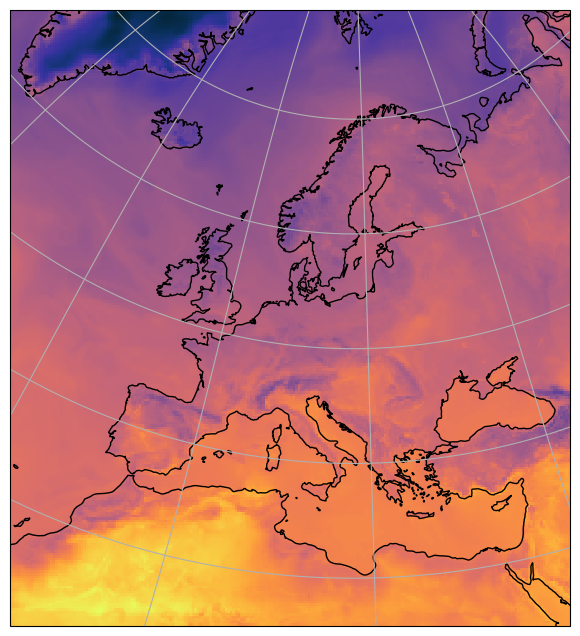

In [34]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
ax.coastlines(resolution="50m")
ax.gridlines(draw_labels=False)

plt.pcolormesh(data['x'], data['y'], data.isel(time=200).T.data, transform=projection, cmap=cmocean.cm.thermal)
#plt.colorbar(label='Total Precipitation (kg m-2)')
#plt.title('Total Precipitation Amount on 1979-01-01')
plt.savefig("figures/temp.png",dpi=300)

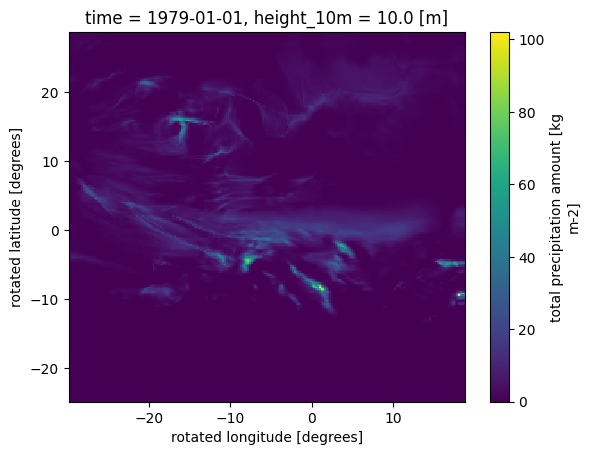

In [4]:
data.isel(time=0).rain.plot()

In [36]:
runoff.isel(river=0)

<xarray.DataArray 'roflux' (time: 9862)>
array([19.89773683, 19.77334802, 19.64895922, ..., 17.79382896,
       16.35770988, 15.15028858])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2005-12-31
Attributes:
    units:    m**3/s
    basin:    Kattegat
    lon:      11.097068
    lat:      53.974945

In [40]:
datapath="/silor/boergel/paper/runoff_prediction/data"


<xarray.DataArray 'roflux' (time: 9862)>
array([565.54025269, 561.38873389, 557.2372151 , ..., 310.49160767,
       324.5994873 , 338.81140137])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2005-12-31
Attributes:
    units:    m**3/s
    basin:    Kattegat
    lon:      11.097068
    lat:      53.974945

In [42]:
from glob import glob
allrivers = glob(f"{datapath}/runoffData/combined_fastriver_*.nc")
allrivers

['/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_042.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_001.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_043.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_002.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_044.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_003.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_045.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_004.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_047.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_005.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_046.nc',
 '/silor/boergel/paper/runoff_prediction/data/runoffData/combined

In [44]:
i

'/silor/boergel/paper/runoff_prediction/data/runoffData/combined_fastriver_058.nc'

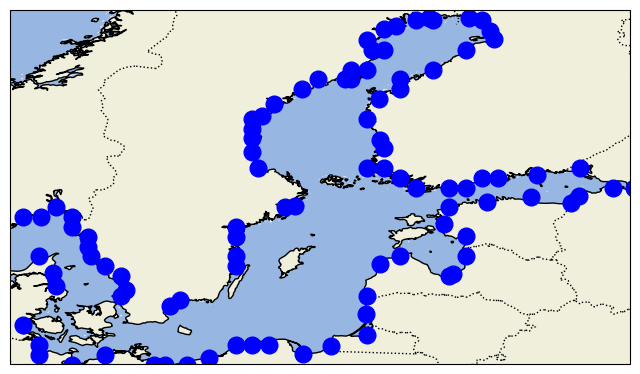

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with a specific projection
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([9, 30, 54, 66])  # Adjust the extent to focus on the Baltic Sea

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Assuming `dataset` is your xarray dataset containing river data
for i in allrivers:
    river = xr.open_dataset(i)
    lon = river.roflux.attrs['lon']
    lat = river.roflux.attrs['lat']
    ax.plot(lon, lat, marker='o', color='blue', markersize=12, transform=ccrs.PlateCarree())

plt.show()


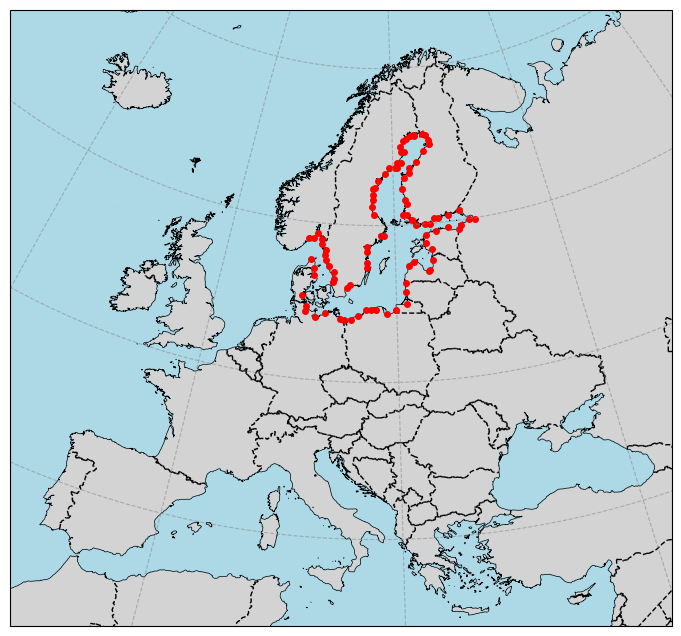

In [65]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

projection = ccrs.RotatedPole(pole_longitude=-162, pole_latitude=39.25)

# Create a figure with the specified projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
ax.set_extent([-10, 40, 34, 72], crs=ccrs.PlateCarree())

# Add map features for better visualization
ax.add_feature(cfeature.LAND.with_scale('10m'), color='lightgray')
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightblue')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle='--')

# Add gridlines and label them
ax.gridlines(draw_labels=False, color='gray', alpha=0.5, linestyle='--')

# Plotting the rivers
for i in allrivers:
    river = xr.open_dataset(i)
    lon = river.roflux.attrs['lon']
    lat = river.roflux.attrs['lat']
    ax.plot(lon, lat, marker='o', color='red', markersize=4, transform=ccrs.PlateCarree())
    #ax.text(lon, lat, river.roflux.attrs['basin'], transform=ccrs.PlateCarree(), fontsize=8)

plt.savefig("figures/baltic_sea_rivers.png")